# MILESTONE 2

## Introduction

`Kezia Intan Natalie`

`Batch 03`

Link Dataset : `https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset`

Link Hugging Face : `https://huggingface.co/spaces/Keziaa/Milestone2-Phase1`

## Problem Statement

Here we want to classify stroke based on gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status. Is it all related?

## Objective Problems

1. Which gender has the most strokes?
2. Does smoking affect stroke?
3. Which work type has the most affect stroke?
4. Can hypertension	and heart_disease also cause a stroke?
5. Does married cause a stroke?

## Import Library

Import all library that we need

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Correlation
from phik import resources, report
from phik.report import plot_correlation_matrix

#Split
from sklearn.model_selection import train_test_split

#Capping
from feature_engine.outliers import Winsorizer

# Scale and Encode
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

# Imbalancing
from imblearn.over_sampling import SMOTENC

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Cross validation and Evaluate
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb
from sklearn.compose import ColumnTransformer

# Saving
import joblib

import warnings
warnings.filterwarnings('ignore')

## Data Loading

Load our dataset

In [2]:
# Read dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

Show the first ten rows

In [3]:
# First ten rows
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Show the last ten rows

In [4]:
# Last ten rows
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


See how many data entries

In [5]:
# Rows, Columns
df.shape

(5110, 12)

Check the datatype

In [6]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


See the unique value of each columns

In [7]:
# Unique values
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

Check the missing value

In [8]:
# Missing value
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 missing value in `bmi` we will handle it later

Check the duplicate

In [9]:
# Duplicate
df.duplicated().value_counts()

False    5110
dtype: int64

There is no duplicate

## Data Cleaning

Check the data distribution

In [10]:
# Skew
df.skew()

id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

The `bmi` column is skew so we fill the missing value with median

In [11]:
# Fill missing value
df['bmi'].fillna(df['bmi'].median(),inplace=True)

There is no more missing value

In [12]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Exploratory and Analysis (EDA)

See the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum of numerical columns

In [13]:
# Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


See the correlation of numerical columns

<AxesSubplot:>

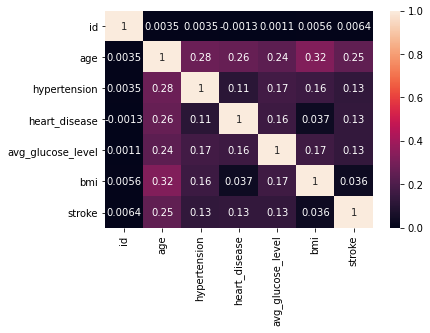

In [14]:
sns.heatmap(data=df.corr(),annot=True)

Check the target distribution

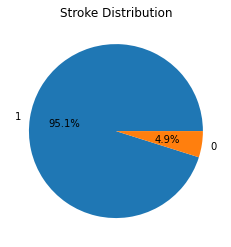

In [15]:
labels = df['stroke'].unique()
values = df['stroke'].value_counts()

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Stroke Distribution")
plt.show()

Our target is imbalance so we will handle it later

Here we want to answer our objective problems

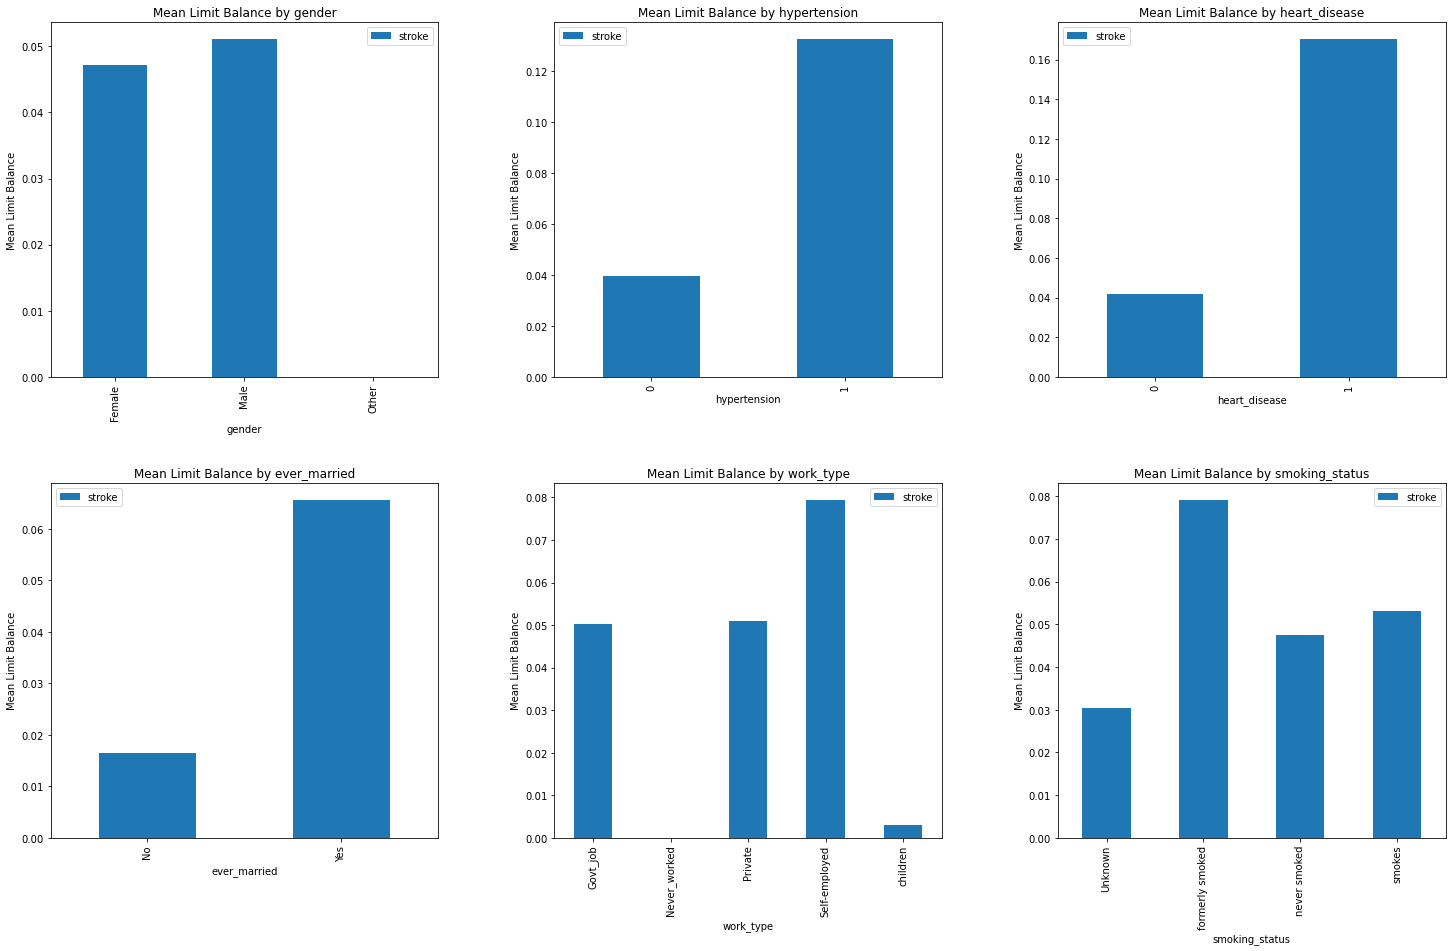

In [16]:
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status']

fig, axs = plt.subplots(2, 3, figsize=(25,15))
axs = axs.ravel()
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i, col in enumerate(columns):
    df.groupby(col)[['stroke']].mean().sort_values(col).plot(kind='bar', ax=axs[i])
    axs[i].set_title(f"Mean Limit Balance by {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Mean Limit Balance")

plt.show()

1. As we can see `Male` has the most stroke but has not too much different from `Female`.
2. `Formerly smoked` has the most stroke but for `never smoked` and `smokes` has not too much different, so it doesn't really matter.
3. `Self employed` has the most stroke.
4. Yes, as we can see number 1(Yes) has the most stroke.
5. Yes the most has stroke is married.

## Split Train and Test

Now split the target and feature

In [17]:
x = df.drop('stroke', axis=1)
y = df['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
numcol = ['age', 'avg_glucose_level', 'bmi']
numcol

['age', 'avg_glucose_level', 'bmi']

In [19]:
catcol = ['gender',	'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
catcol

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

Concate with train data

In [20]:
x_train_num = x_train[numcol]
x_train_cat = x_train[catcol]

x_test_num = x_test[numcol]
x_test_cat = x_test[catcol]

### Scale and Encode

Scale the numerical data

In [21]:
scale = MinMaxScaler()
scale.fit(x_train_num)

x_train_num_scale = scale.transform(x_train_num)
x_test_num_scale = scale.transform(x_test_num)

x_train_num_scale

array([[0.43847656, 0.05618133, 0.3024055 ],
       [0.4140625 , 0.13115132, 0.43757159],
       [0.73144531, 0.04634844, 0.23482245],
       ...,
       [0.53613281, 0.18276244, 0.20733104],
       [0.25537109, 0.30385006, 0.22222222],
       [0.70703125, 0.02031207, 0.26231386]])

Encode the categorical data

In [22]:
encode = OneHotEncoder(sparse=False)
encode.fit(x_train_cat)

x_train_cat_encode = encode.transform(x_train_cat)
x_test_cat_encode = encode.transform(x_test_cat)

x_train_cat_encode

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

See the correlation between numerical and categorical

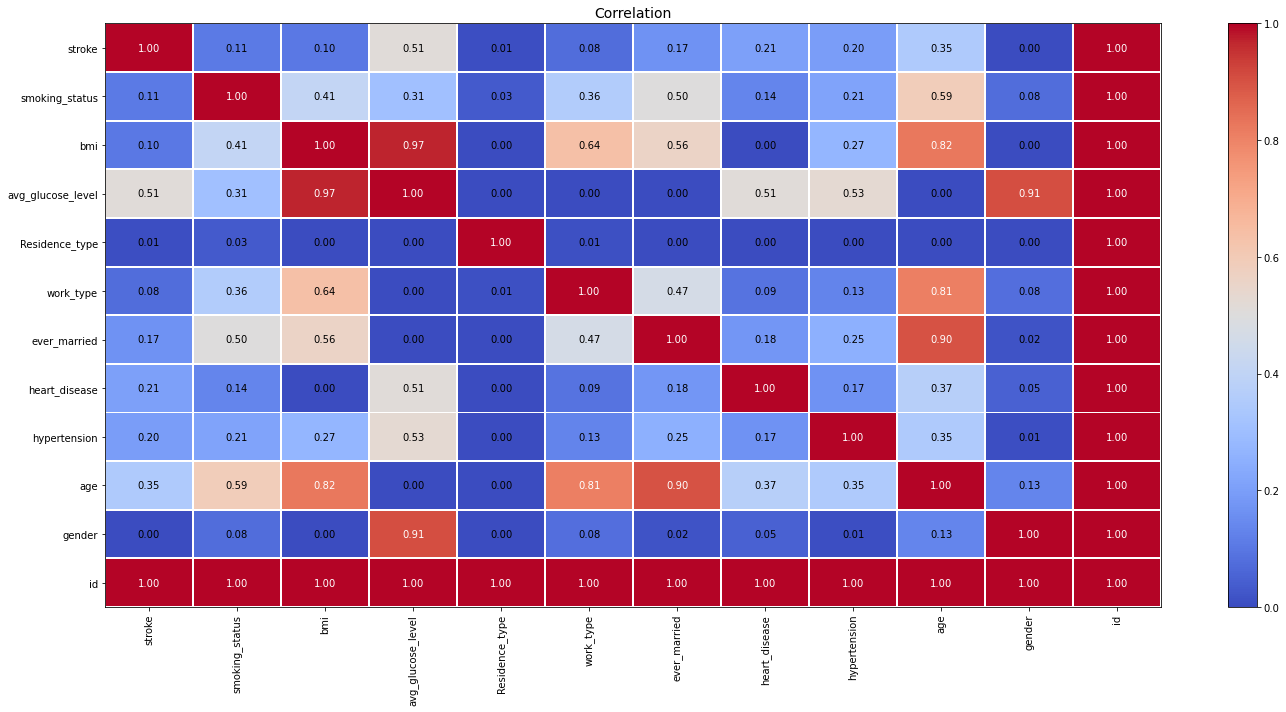

In [23]:
# Visualize the correlation

phik_corr = df.phik_matrix(interval_cols='stroke')

plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map='coolwarm', 
                        title=r'Correlation', 
                        figsize=(20,10))
plt.show()

By using  threshold 0.1 here feature that we choose that greater than 0.1 :
- smoking status
- bmi
- average glucose level
- ever married
- heart disease
- hypertension
- age

## Feature Engineering

Seperate the numerical and categorical feature

In [24]:
numcols = ['age', 'avg_glucose_level', 'bmi']

In [25]:
catcols = ['hypertension', 'heart_disease', 'ever_married', 'smoking_status']

In [26]:
x_train_nums = x_train[numcols]
x_train_cats = x_train[catcols]

x_test_nums = x_test[numcols]
x_test_cats = x_test[catcols]

## Data Prepocessing

See the outliers in numerical data

In [27]:
def diagnostic_plots(x_train_nums, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x_train_nums[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=x_train_nums[variable])
    plt.title('Boxplot')

    plt.show()

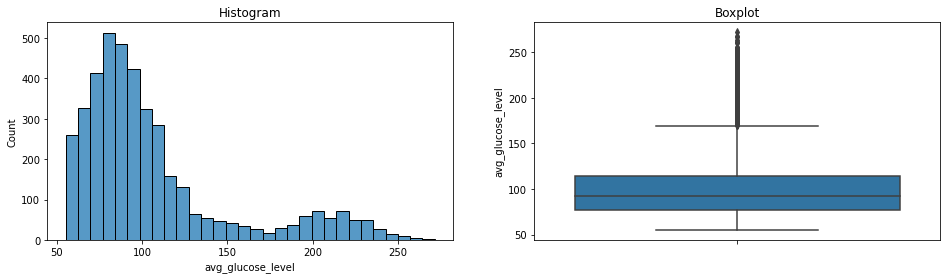

In [28]:
diagnostic_plots(x_train_nums, 'avg_glucose_level')

See the skewness

In [29]:
x_train_nums['avg_glucose_level'].skew()

1.5568048719624683

Its moderate skew so we check with 1.5 iqr

In [30]:
# Outlier detection using IQR 
Q3 = x_train_nums['avg_glucose_level'].quantile(.75)
Q1 = x_train_nums['avg_glucose_level'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = x_train_nums[(x_train_nums['avg_glucose_level'] > upper) | (x_train_nums['avg_glucose_level'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  501
percentage of outlier:  9.804305283757339 %


There are 9% outliers so we have to capping it

In [31]:
# Cappinng the outlier
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['avg_glucose_level'])

x_train_nums = wins.fit_transform(x_train_nums)

There is no more outliers

In [32]:
outlier = x_train_nums[(x_train_nums['avg_glucose_level'] > upper) | (x_train_nums['avg_glucose_level'] < lower)]
print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


## Scale and Encode

Scale the numerical feature

In [33]:
scaled = MinMaxScaler()
scaled.fit(x_train_nums)

x_train_num_scaled = scaled.transform(x_train_nums)
x_test_num_scaled = scaled.transform(x_test_nums)

x_train_num_scaled

array([[0.43847656, 0.05618133, 0.3024055 ],
       [0.4140625 , 0.13115132, 0.43757159],
       [0.73144531, 0.04634844, 0.23482245],
       ...,
       [0.53613281, 0.18276244, 0.20733104],
       [0.25537109, 0.30385006, 0.22222222],
       [0.70703125, 0.02031207, 0.26231386]])

Encode the categorical feature

In [34]:
encoded = OneHotEncoder(sparse=False)
encoded.fit(x_train_cats)

x_train_cat_encoded = encoded.transform(x_train_cats)
x_test_cat_encoded = encoded.transform(x_test_cats)

x_train_cat_encoded

array([[1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

Concate the scaled and encoded feature

In [35]:
# Concate the feature
x_train_finals = np.concatenate([x_train_num_scaled, x_train_cat_encoded], axis=1)
x_test_finals = np.concatenate([x_test_num_scaled, x_test_cat_encoded], axis=1)

## Handling Imbalance

Now handle our imbalance data with `smotenc` because we have numerical and categorical feature

In [36]:
smotenc = SMOTENC([3,4,5,6,7,8,9,10,11], random_state=42)
x_train_finals, y_trains = smotenc.fit_resample(x_train_finals, y_train)
y_trains.value_counts()

0    3893
1    3893
Name: stroke, dtype: int64

Now our data already balance

## Model Definition

Define all model

In [37]:
# Defining Logistic Regression Model
log_model = LogisticRegression(max_iter=1000000)
# Defining SVM Classifier Model
svm_model = SVC()
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier()
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier()
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()
# Defining naive bayes Model
nb_model = GaussianNB()
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier()

Check the cross validation and see the best model

In [38]:
# checking cross validation score
skfold = StratifiedKFold(n_splits=5)
cv_log_model = cross_val_score(log_model, x_train_finals, y_trains, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm_model, x_train_finals, y_trains, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(dt_model, x_train_finals, y_trains, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf_model, x_train_finals, y_trains, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn_model, x_train_finals, y_trains, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb_model, x_train_finals, y_trains, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada_model, x_train_finals, y_trains, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],['log_model','svm_model','dt_model','rf_model','knn_model','nb_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.82156611 0.85347044 0.83419023 0.86521181 0.82028241]
recall - Mean - Cross Validation :  0.8389442004283391
recall - Std - Cross Validation  :  0.017741811602350298
recall - Range of Test-Set       :  0.8212023888259887 - 0.8566860120306894
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.84082157 0.88560411 0.87532134 0.89602054 0.87419769]
recall - Mean - Cross Validation :  0.8743930488959876
recall - Std - Cross Validation  :  0.018554679386973895
recall - Range of Test-Set       :  0.8558383695090137 - 0.8929477282829614
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.80616175 0.93059126 0.93187661 0.93709884 0.91784339]
recall - Mean - Cross Validation :  0.9047143691569509
recall - Std - Cross Validation  :  0.049681275323777675
recall - Range of Test-Set       :  0.8550330938331733 - 0.9543956444807286
--------------------------

Here we got `KNearestNeighbors` for best model for our data

## Model Training

Predict the data with best model

In [39]:
knn_model.fit(x_train_finals, y_trains)

knn_pred_train = knn_model.predict(x_train_finals)
knn_pred_test = knn_model.predict(x_test_finals)

knn_pred_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## Model Evaluation

Evaluate the model with `classification report`

clasification report train nb =               precision    recall  f1-score   support

           0       0.98      0.86      0.92      3893
           1       0.88      0.98      0.93      3893

    accuracy                           0.92      7786
   macro avg       0.93      0.92      0.92      7786
weighted avg       0.93      0.92      0.92      7786

clasification report test nb =               precision    recall  f1-score   support

           0       0.96      0.85      0.90       968
           1       0.12      0.35      0.18        54

    accuracy                           0.82      1022
   macro avg       0.54      0.60      0.54      1022
weighted avg       0.91      0.82      0.86      1022

Confusion Matrix      : 


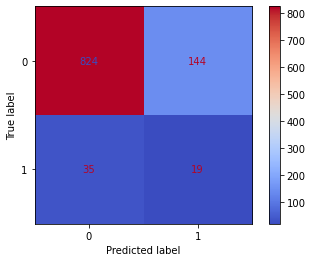

In [40]:
print('clasification report train nb =', classification_report(y_trains, knn_pred_train))
print('clasification report test nb =', classification_report(y_test, knn_pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_model, x_test_finals, y_test, cmap='coolwarm'))

In train recall has good score with 98 but in test recall has bad score with 35 which is overfitting

## Hyperparameter Tuning

Now we try to tune the model with `GridSearch`

In [41]:
param_grid = {'n_neighbors':[11, 13, 15, 17, 19, 21], 'weights':['uniform', 'distance']}

knn_grid = GridSearchCV(knn_model, param_grid=param_grid, cv=5, scoring='recall')
knn_grid.fit(x_train_finals,y_trains)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [11, 13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

Here we got best estimator with `n neighbors` is 19

In [42]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=19, weights='distance')

## Model Training

Again predict our model tuned

In [43]:
knn_grid.fit(x_train_finals, y_trains)

knn_grid_train = knn_grid.predict(x_train_finals)
knn_grid_test = knn_grid.predict(x_test_finals)

knn_grid_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## Model Evaluation

See the `classification report` for model tuned

clasification report train nb =               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3893
           1       1.00      1.00      1.00      3893

    accuracy                           1.00      7786
   macro avg       1.00      1.00      1.00      7786
weighted avg       1.00      1.00      1.00      7786

clasification report test nb =               precision    recall  f1-score   support

           0       0.97      0.78      0.87       968
           1       0.14      0.61      0.22        54

    accuracy                           0.77      1022
   macro avg       0.55      0.70      0.54      1022
weighted avg       0.93      0.77      0.83      1022

Confusion Matrix      : 


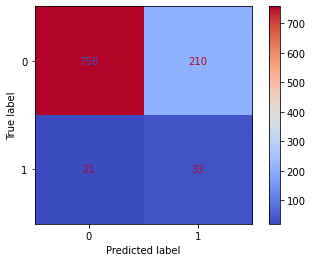

In [44]:
print('clasification report train nb =', classification_report(y_trains, knn_grid_train))
print('clasification report test nb =', classification_report(y_test, knn_grid_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_grid, x_test_finals, y_test, cmap='coolwarm'))

In train recall has good score with 100 but in test recall has bad score with 61 which is still overfitting but there is a improvement so we use the `n neighbors` 19

## Model Analysis

Our model has good score in data train but has bad score in data test which means overfitting. Overfitting occurs when a model is trained too well on the training data and performs poorly on new, maybe there is unseen data. As a result, the model is not able to generalize well to new data.

## Pipeline

Now input all of our process as scale, encode, smote, model into pipeline

In [45]:
num_pipeline = Pipeline([('scale', MinMaxScaler())])

cat_pipeline = Pipeline([('encode', OneHotEncoder())])

final_prep = ColumnTransformer([
        ("num", num_pipeline, numcols),
        ("cat", cat_pipeline, catcols)
])

# imbalance pipeline
full_imbhandling = imb([
            ('preprocess', final_prep),
            ('over_sampl', SMOTENC([3,4,5,6,7,8,9,10,11], random_state=42)),
            ('naive_bayes', KNeighborsClassifier(n_neighbors=19))
])

full_imbhandling.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder())]),
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'ever_married',
                                                   'smoking_status'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[3, 4, 5, 6, 7, 8, 9, 10, 11],
                         random_state=42)),
                ('naive_bayes', KNeighborsClassifier(n_neighbors=19))])

In [46]:
full_imbhandling.predict(x_test)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

## Model Saving

Save our pipeline

In [47]:
with open('pipeline_knn.pkl', 'wb') as file_1:
  joblib.dump(full_imbhandling, file_1)

## Overall Analysis

Stroke can affected by `hypertension`, `heart_disease`, `married`, and also loneliness because of `self employed`.\
Gender is not really affected for stroke it's equal for both.\
Scale the numerical and encode the categorical.\
Our model selected is `KNearestNeighbors` for best model but it's overfitting so we tune it.\
Then save the best model which is already tuned.